In [1]:
#라이브러리 불러오기
import pymssql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#경고 메세지 출력 안함
import warnings
warnings.filterwarnings('ignore')

C:\Users\bit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


In [2]:
conn = pymssql.connect(server="14.32.18.226", user="as", password="1234", database="YL1")

In [3]:
data = pd.read_sql("SELECT  A.Date, ISNULL(A.spend,0) + ISNULL(B.spend,0) + ISNULL(C.spend,0) 'Spend', ISNULL(A.charge,0) + ISNULL(B.charge,0) + ISNULL(C.charge,0) 'Charge' FROM ( (SELECT Date, sum(Spend) 'spend', sum(charge) 'charge' FROM UsageByCard GROUP BY Date) A FULL OUTER JOIN (SELECT Date, sum(Spend) 'spend', sum(charge) 'charge' FROM UsageByGiftCard GROUP BY Date) B on A.Date= B.Date FULL OUTER JOIN  (SELECT Date, sum(Spend) 'spend', sum(charge) 'charge' FROM UsageByMobile GROUP BY Date) C on A.Date= C.Date)", conn)
data

,Date,Spend,Charge
0,2019-01,3963836,4792280
1,2019-02,3792817,6343460
2,2019-03,6349084,8063493
3,2019-04,8981767,18880343
4,2019-05,27044730,60901803
5,2019-06,35173486,36356753
6,2019-07,48930055,71121971


In [4]:
# 월별 사용액이 숫자타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있습니다.
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7 non-null      object
 1   Spend   7 non-null      int64 
 2   Charge  7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 296.0+ bytes


In [5]:
# 타입을 알 수 있다.
data.dtypes

Date      object
Spend      int64
Charge     int64
dtype: object

In [6]:
# 결측치를 알 수 있다.
data.isnull().sum()

Date      0
Spend     0
Charge    0
dtype: int64

In [7]:
# 처리 전과 비교해 보기 위해 데이터를 복사
data_copy = data.copy()

In [7]:
data

,Date,Spend,Charge
0,2019-01,3963836,4792280
1,2019-02,3792817,6343460
2,2019-03,6349084,8063493
3,2019-04,8981767,18880343
4,2019-05,27044730,60901803
5,2019-06,35173486,36356753
6,2019-07,48930055,71121971


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
def encode_features(dataDF) :
    features = ['Date']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

data = encode_features(data)

In [10]:
data

,Date,Spend,Charge
0,0,3963836,4792280
1,1,3792817,6343460
2,2,6349084,8063493
3,3,8981767,18880343
4,4,27044730,60901803
5,5,35173486,36356753
6,6,48930055,71121971


In [11]:
def drop_features(dataDF):
    dataDF.drop(['Spend'], axis=1, inplace=True)
    return dataDF

data = drop_features(data)

In [14]:
y_data = data["Charge"].to_frame()
y_data

,Charge
0,4792280
1,6343460
2,8063493
3,18880343
4,60901803
5,36356753
6,71121971


In [16]:
x_data = data["Date"].to_frame()
x_data

,Date
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [17]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_data, y_data)

LinearRegression()

In [18]:
ln_pred = ln.predict(x_data)  # 선형회귀 그래프 선

In [20]:
print(ln_pred)

[[-3918624.82142856]
 [ 7219016.92857143]
 [18356658.67857143]
 [29494300.42857143]
 [40631942.17857143]
 [51769583.92857143]
 [62907225.67857142]]


In [19]:
ln.coef_  #기울기

array([[7798415.75]])

In [20]:
ln.intercept_  # 절편

array([-4218707.96428571])

In [21]:
ln.predict([[7]])  #201908의 사용량 예측

array([[50370202.28571428]])

In [22]:
import joblib as job

In [23]:
job.dump(ln, './충전량머신러닝testModel.pkl')

['./충전량머신러닝testModel.pkl']

**<h4>선형회귀 그래프</h4>**

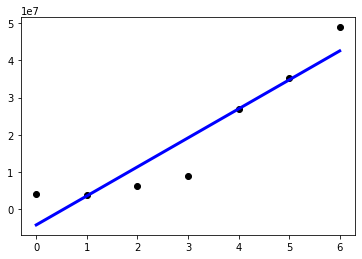

In [31]:
plt.scatter(x_data, y_data, color = 'black')
plt.plot(x_data, ln_pred, color = 'blue', linewidth = 3)
plt.show()

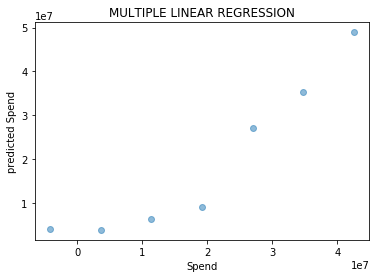

In [24]:
plt.scatter(ln_pred, y_data, alpha=0.5)
plt.xlabel("Spend")
plt.ylabel("predicted Spend")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
conn.close()